# 机器学习：聚类实验

## 数据预处理

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

### 数据内容展示

In [4]:
original_data = pd.read_csv('./dataset/original.csv',index_col=0)
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7050 entries, 1 to 7050
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_type       7050 non-null   object 
 1   status_published  7050 non-null   object 
 2   num_reactions     7050 non-null   int64  
 3   num_comments      7050 non-null   int64  
 4   num_shares        7050 non-null   int64  
 5   num_likes         7050 non-null   int64  
 6   num_loves         7050 non-null   int64  
 7   num_wows          7050 non-null   int64  
 8   num_hahas         7050 non-null   int64  
 9   num_sads          7050 non-null   int64  
 10  num_angrys        7050 non-null   int64  
 11  Column1           0 non-null      float64
 12  Column2           0 non-null      float64
 13  Column3           0 non-null      float64
 14  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(2)
memory usage: 881.2+ KB


### 数据唯一值展示

In [6]:
original_data.nunique()

status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

### 展现文件数据样例

In [14]:
original_data.head(15)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
status_id,,,,,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN


### 数据清洗：清洗掉最后四列的无用数据

In [21]:
clean_data = original_data.dropna(axis=1)
clean_data.head(15)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,,
1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0
7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3
8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1
9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0


### 数据清洗：编码非数值信息`status_type`

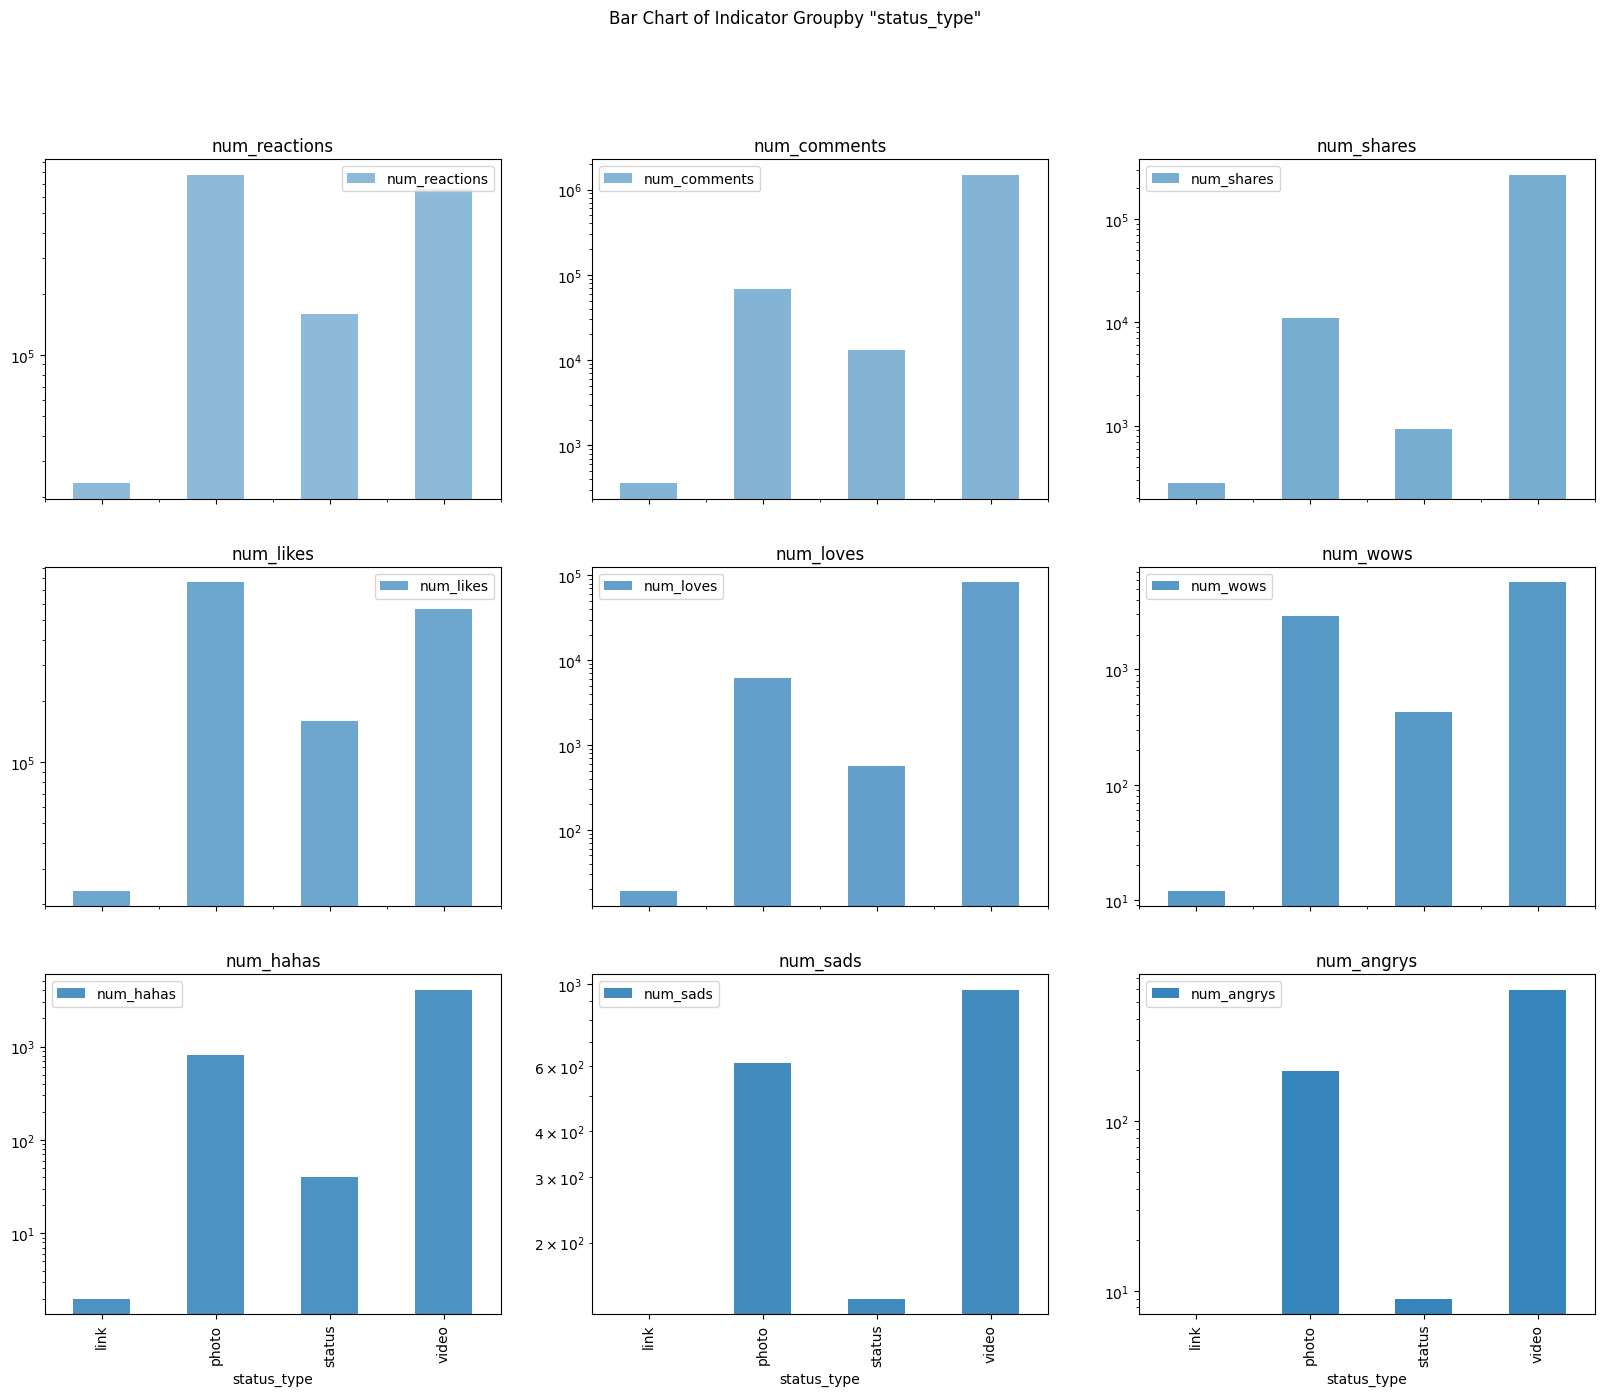

In [24]:
# 可视化数据
# 通过status_type分组画柱状图，
# status_id有四种选择：status，link，photo，video
labels=['num_reactions','num_comments','num_shares',
       'num_likes','num_loves','num_wows',
       'num_hahas','num_sads','num_angrys']

fig = plt.figure(figsize=(20,15))
fig.suptitle('Bar Chart of Indicator Groupby "status_type"')
for num in range(len(labels)):
    ax=fig.add_subplot(3,3,num+1)
    clean_data.groupby('status_type').sum().plot(
        ax=ax,
        sharex=True,
        subplots=True,
        alpha=0.5+0.05*num,
        kind='bar',
        y=labels[num],
        logy=True)
fig.savefig('./result/img/1.Group_labels_bar.png')
